In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import art3d

In [2]:
int_stats_df = pd.read_pickle("int_stats_df.pkl")
event0_g4_df = pd.read_pickle("event0_g4_df.pkl")
resets_df_micro = pd.read_pickle("resets_df_micro.pkl")
event0_resets_df_micro = pd.read_pickle("event0_resets_df_micro.pkl")
active_pixels_df = pd.read_pickle("active_pixels_df.pkl")
pixel_stats_df = pd.read_pickle("pixel_stats_df.pkl")

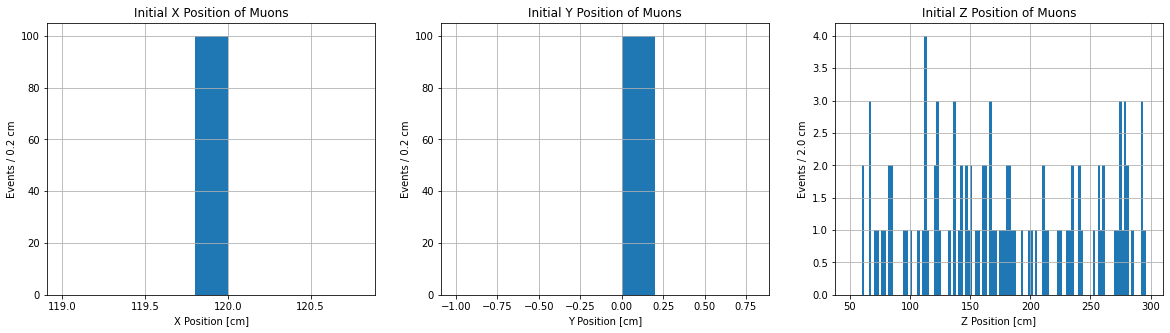

In [3]:
fig, axes = plt.subplots(1, 3, figsize=(20,5))
int_stats_df["xi_muon"].hist(ax=axes[0], bins=np.arange(119, 121, 0.2))
axes[0].locator_params(axis='x', nbins=6)
axes[0].set_title('Initial X Position of Muons')
axes[0].set_xlabel('X Position [cm]')
axes[0].set_ylabel('Events / 0.2 cm')
int_stats_df["yi_muon"].hist(ax=axes[1], bins=np.arange(-1, 1, 0.2))
axes[1].set_title('Initial Y Position of Muons')
axes[1].set_xlabel('Y Position [cm]')
axes[1].set_ylabel('Events / 0.2 cm')
int_stats_df["zi_muon"].hist(ax=axes[2], bins=np.arange(50, 300, 2))
axes[2].set_title('Initial Z Position of Muons')
axes[2].set_xlabel('Z Position [cm]')
axes[2].set_ylabel('Events / 2.0 cm')
axes[0].plot
axes[1].plot
axes[2].plot
plt.savefig('Muon_Positions.png', dpi=1200)

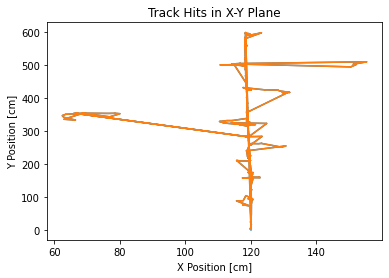

In [4]:
fig = plt.figure()
plt.plot(event0_g4_df.xi, event0_g4_df.yi, event0_g4_df.xf, event0_g4_df.yf)
plt.title("Track Hits in X-Y Plane")
plt.xlabel("X Position [cm]")
plt.ylabel("Y Position [cm]")
plt.savefig('HitTracks_XY.png', dpi=1200)

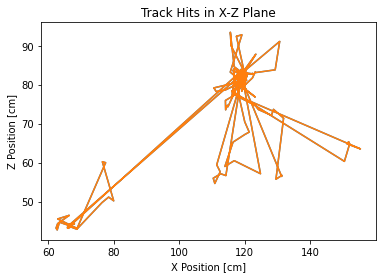

In [5]:
fig = plt.figure()
plt.plot(event0_g4_df.xi,event0_g4_df.zi, event0_g4_df.xf, event0_g4_df.zf)
plt.title("Track Hits in X-Z Plane")
plt.xlabel("X Position [cm]")
plt.ylabel("Z Position [cm]")
plt.savefig('HitTracks_XZ.png', dpi=1200)

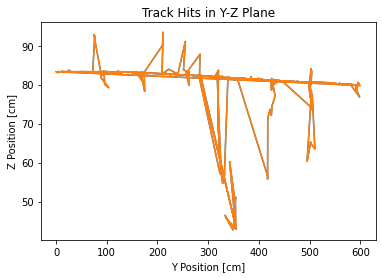

In [6]:
fig = plt.figure()
plt.plot(event0_g4_df.yi, event0_g4_df.zi, event0_g4_df.yf, event0_g4_df.zf)
plt.title("Track Hits in Y-Z Plane")
plt.xlabel("Y Position [cm]")
plt.ylabel("Z Position [cm]")
plt.savefig('HitTracks_YZ.png', dpi=1200)

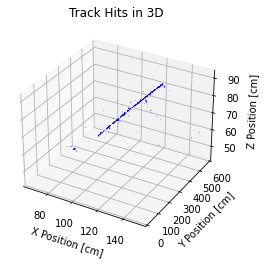

In [7]:
xi_0= event0_g4_df.xi
xf_0= event0_g4_df.xf
yi_0= event0_g4_df.yi
yf_0= event0_g4_df.yf
zi_0= event0_g4_df.zi
zf_0= event0_g4_df.zf

def draw_3d_lines(xi, yi, zi, xf, yf, zf):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    for i in range(len(xi)):
        line = art3d.Line3D([xi[i], xf[i]], [yi[i], yf[i]], [zi[i], zf[i]], ls='-', lw='0.25', color='b')
        ax.add_line(line)
    
    plt.title("Track Hits in 3D")
    ax.set_xlabel("X Position [cm]")
    ax.set_ylabel("Y Position [cm]")
    ax.set_zlabel("Z Position [cm]")
    ax.set_xlim3d([np.min(xi), np.max(xf)])
    ax.set_ylim3d([np.min(yi), np.max(yf)])
    ax.set_zlim3d([np.min(zi), np.max(zf)])
    ax.plot

draw_3d_lines(xi_0, yi_0, zi_0, xf_0, yf_0, zf_0)
plt.savefig('HitTracks_3D.png', dpi=1200)

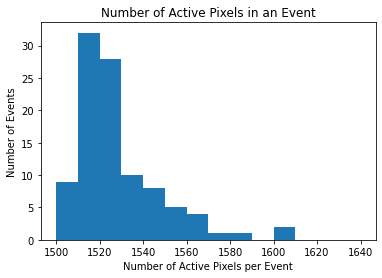

In [8]:
plt.hist(active_pixels_df.active_pixels, bins=np.arange(1500, 1650, 10))
plt.title("Number of Active Pixels in an Event")
plt.xlabel("Number of Active Pixels per Event")
plt.ylabel("Number of Events")
plt.savefig('Active_Pixels_in_Event.png', dpi=1200)

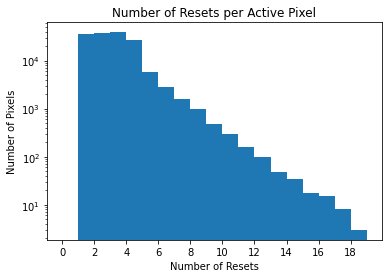

In [9]:
plt.hist(pixel_stats_df.resets, bins=np.arange(0, 20, 1))
plt.xticks(range(0,20,2))
plt.yscale("log")
plt.title("Number of Resets per Active Pixel")
plt.xlabel("Number of Resets")
plt.ylabel("Number of Pixels")
plt.savefig('Resets_per_Pixel.png', dpi=1200)

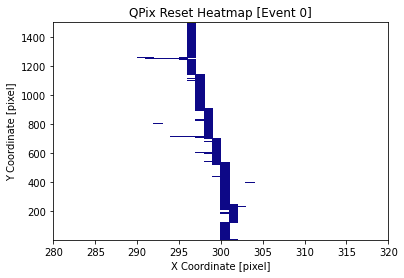

In [10]:
xbin_range_one = max(pixel_stats_df[pixel_stats_df.event == 0].pix_x) - min(pixel_stats_df[pixel_stats_df.event == 0].pix_x)
ybin_range_one = max(pixel_stats_df[pixel_stats_df.event == 0].pix_y) - min(pixel_stats_df[pixel_stats_df.event == 0].pix_y)
fig = plt.figure()
plt.hist2d(pixel_stats_df[pixel_stats_df.event == 0].pix_x, pixel_stats_df[pixel_stats_df.event == 0].pix_y, bins=[xbin_range_one,ybin_range_one], cmin=1, cmap='plasma')
plt.xlim(280,320)
plt.title("QPix Reset Heatmap [Event 0]")
plt.xlabel("X Coordinate [pixel]")
plt.ylabel("Y Coordinate [pixel]")
plt.savefig('QPix_Heatmap_OneEvent.png', dpi=1200)

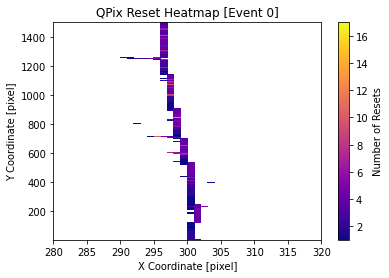

In [11]:
xbin_range_one = max(pixel_stats_df[pixel_stats_df.event == 0].pix_x) - min(pixel_stats_df[pixel_stats_df.event == 0].pix_x)
ybin_range_one = max(pixel_stats_df[pixel_stats_df.event == 0].pix_y) - min(pixel_stats_df[pixel_stats_df.event == 0].pix_y)
fig = plt.figure()
plt.hist2d(pixel_stats_df[pixel_stats_df.event == 0].pix_x, pixel_stats_df[pixel_stats_df.event == 0].pix_y, bins=[xbin_range_one,ybin_range_one], weights=pixel_stats_df[pixel_stats_df.event == 0].resets, cmin=1, cmap='plasma')
cb = plt.colorbar()
cb.set_label('Number of Resets')
plt.xlim(280,320)
plt.title("QPix Reset Heatmap [Event 0]")
plt.xlabel("X Coordinate [pixel]")
plt.ylabel("Y Coordinate [pixel]")
plt.savefig('QPix_Heatmap_OneEvent_Weighted.png', dpi=1200)

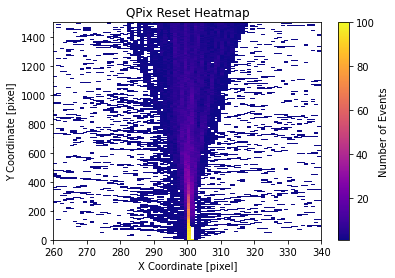

In [12]:
xbin_range = max(pixel_stats_df.pix_x) - min(pixel_stats_df.pix_x)
ybin_range = max(pixel_stats_df.pix_y) - min(pixel_stats_df.pix_y)
fig = plt.figure()
plt.hist2d(pixel_stats_df.pix_x, pixel_stats_df.pix_y, bins=[xbin_range,ybin_range], cmin=1, cmap='plasma')
cb = plt.colorbar()
cb.set_label('Number of Events')
plt.xlim(260,340)
plt.title("QPix Reset Heatmap")
plt.xlabel("X Coordinate [pixel]")
plt.ylabel("Y Coordinate [pixel]")
plt.savefig('QPix_Heatmap.png', dpi=1200)

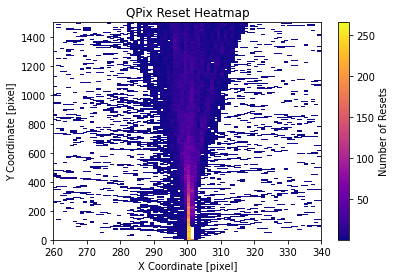

In [13]:
xbin_range = max(pixel_stats_df.pix_x) - min(pixel_stats_df.pix_x)
ybin_range = max(pixel_stats_df.pix_y) - min(pixel_stats_df.pix_y)
fig = plt.figure()
plt.hist2d(pixel_stats_df.pix_x, pixel_stats_df.pix_y, bins=[xbin_range,ybin_range], weights=pixel_stats_df.resets, cmin=1, cmap='plasma')
cb = plt.colorbar()
cb.set_label('Number of Resets')
plt.xlim(260,340)
plt.title("QPix Reset Heatmap")
plt.xlabel("X Coordinate [pixel]")
plt.ylabel("Y Coordinate [pixel]")
plt.savefig('QPix_Heatmap_Weighted.png', dpi=1200)

<ipython-input-39-9f80792d6309>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.hist(event0_resets_df_micro[event0_resets_df_micro.pixel_x == 300][event0_resets_df_micro.pixel_y == 534].reset_time)


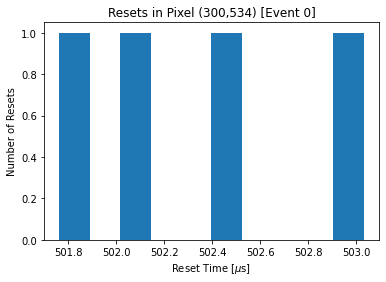

In [39]:
fig = plt.figure()
plt.hist(event0_resets_df_micro[event0_resets_df_micro.pixel_x == 300][event0_resets_df_micro.pixel_y == 534].reset_time)
plt.ylabel("Number of Resets")
plt.xlabel("Reset Time [$\mu$s]")
plt.title("Resets in Pixel (300,534) [Event 0]")
plt.savefig('ResetHist_OneEvent.png', dpi=1200)

<ipython-input-41-896e7e235ecb>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.scatter(pixel_stats_df[pixel_stats_df.resets > 2][pixel_stats_df.event == 0].mean_ToA, pixel_stats_df[pixel_stats_df.resets > 2][pixel_stats_df.event == 0].RMS, s=2)
<ipython-input-41-896e7e235ecb>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.scatter(pixel_stats_df[pixel_stats_df.resets > 2][pixel_stats_df.event == 0].mean_ToA, pixel_stats_df[pixel_stats_df.resets > 2][pixel_stats_df.event == 0].RMS, s=2)


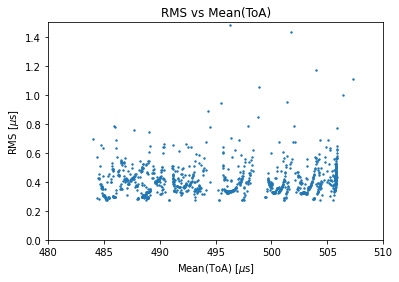

In [41]:
fig = plt.figure()
plt.scatter(pixel_stats_df[pixel_stats_df.resets > 2][pixel_stats_df.event == 0].mean_ToA, pixel_stats_df[pixel_stats_df.resets > 2][pixel_stats_df.event == 0].RMS, s=2)
plt.xlim([480, 510])
plt.ylim([0,1.5])
plt.ylabel("RMS [$\mu$s]")
plt.xlabel("Mean(ToA) [$\mu$s]")
plt.title("RMS vs Mean(ToA)")
plt.savefig('MeanReset_vs_RMS_micro_OneEvent.png', dpi=1200)

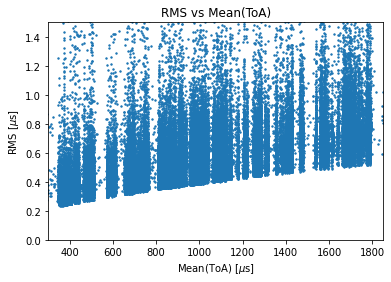

In [42]:
fig = plt.figure()
plt.scatter(pixel_stats_df[pixel_stats_df.resets > 2].mean_ToA, pixel_stats_df[pixel_stats_df.resets > 2].RMS, s=2)
plt.xlim([300, 1850])
plt.ylim([0,1.5])
plt.ylabel("RMS [$\mu$s]")
plt.xlabel("Mean(ToA) [$\mu$s]")
plt.title("RMS vs Mean(ToA)")
plt.savefig('MeanReset_vs_RMS_micro.png', dpi=1200)

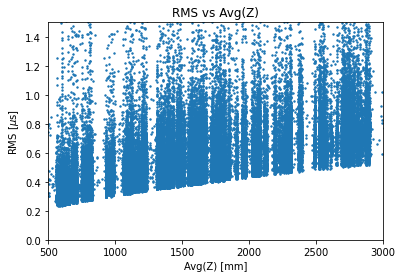

In [43]:
fig = plt.figure()
plt.scatter(pixel_stats_df[pixel_stats_df.resets > 2].mean_ToA*1.618, pixel_stats_df[pixel_stats_df.resets > 2].RMS, s=2)
plt.xlim([500, 3000])
plt.ylim([0,1.5])
plt.ylabel("RMS [$\mu$s]")
plt.xlabel("Avg(Z) [mm]")
plt.title("RMS vs Avg(Z)")
plt.savefig('Z_AVG_vs_RMS_micro.png', dpi=1200)

In [16]:
print(pixel_stats_df[pixel_stats_df.resets < 2])

        event  pix_x  pix_y  resets     mean_ToA  RMS
0           0    159    878       1   271.616404  0.0
4           0    166    882       1   262.207625  0.0
8           0    172    886       1   261.854628  0.0
9           0    290   1259       1   476.120010  0.0
10          0    291   1254       1   484.765423  0.0
...       ...    ...    ...     ...          ...  ...
151857     99    300    527       1  1284.957022  0.0
152813     99    301      1       1  1285.831752  0.0
152814     99    302    685       1  1281.157868  0.0
152815     99    303    863       1  1276.545477  0.0
152816     99    391   1095       1  1189.066838  0.0

[36128 rows x 6 columns]


In [17]:
print(min(pixel_stats_df[pixel_stats_df.event == 0].pix_x))

159


In [37]:
print(pixel_stats_df[pixel_stats_df.event == 0][pixel_stats_df.pix_x == 300][pixel_stats_df.resets < 5])

      event  pix_x  pix_y  resets    mean_ToA       RMS
975       0    300      1       2  505.821033  0.350000
976       0    300      2       2  505.681261  0.270000
977       0    300      3       2  505.660891  0.270000
978       0    300      4       2  505.661132  0.265000
979       0    300      5       2  505.687462  0.270000
...     ...    ...    ...     ...         ...       ...
1391      0    300    529       4  502.168017  0.327824
1392      0    300    531       4  502.360101  0.434533
1393      0    300    532       4  502.342028  0.442521
1394      0    300    533       4  502.362803  0.468688
1395      0    300    534       4  502.329135  0.467941

[380 rows x 6 columns]


<ipython-input-37-da2e81943c94>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(pixel_stats_df[pixel_stats_df.event == 0][pixel_stats_df.pix_x == 300][pixel_stats_df.resets < 5])
<ipython-input-37-da2e81943c94>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(pixel_stats_df[pixel_stats_df.event == 0][pixel_stats_df.pix_x == 300][pixel_stats_df.resets < 5])


In [31]:
print(event0_resets_df_micro[event0_resets_df_micro.pixel_x ==300])

      event  pixel_x  pixel_y  reset_time          TSLR  nMCParticles
4941      0      300        1  505.471033  5.054710e-04             1
4942      0      300        1  506.171033  7.000000e-07             1
4943      0      300        2  505.411261  5.054113e-04             1
4944      0      300        2  505.951261  5.400000e-07             1
4945      0      300        3  505.390891  5.053909e-04             1
...     ...      ...      ...         ...           ...           ...
6334      0      300     1480  480.391033  4.803910e-04             2
6335      0      300     1480  480.741033  3.500000e-07             2
6336      0      300     1480  481.021033  2.800000e-07             2
6337      0      300     1480  481.321033  3.000000e-07             2
6338      0      300     1480  481.881033  5.600000e-07             2

[1398 rows x 6 columns]


In [40]:
print(event0_resets_df_micro[event0_resets_df_micro.pixel_x == 300][event0_resets_df_micro.pixel_y == 534].reset_time)

6083    501.761635
6084    502.101635
6085    502.421635
6086    503.031635
Name: reset_time, dtype: float64


<ipython-input-40-ea57e64010ba>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(event0_resets_df_micro[event0_resets_df_micro.pixel_x == 300][event0_resets_df_micro.pixel_y == 534].reset_time)
